In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('E-commerce Website Logs(in).csv')
data.head()

C:\Users\palak\AppData\Local\Temp\ipykernel_25100\1624441.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('E-commerce Website Logs(in).csv')


,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method
0,43:57.2,2533,TCP,1.10.195.126,20100,Chrome,28,Female,CA,Normal,English,261.9600,No,0.0,Credit Card
1,43:57.2,4034,TCP,1.1.217.211,20500,Mozilla Firefox,21,Male,AR,Normal,English,731.9400,No,0.0,Debit Card
2,43:26.1,1525,TCP,1.115.198.107,90100,Mozilla Firefox,20,Male,PL,Normal,English,14.6200,No,0.0,Cash
3,43:26.1,4572,TCP,1.121.152.143,100300,Mozilla Firefox,66,Female,IN,Normal,Spanish,957.5775,No,0.0,Credit Card
4,17:09.0,3652,TCP,1.123.135.213,270200,Mozilla Firefox,53,Female,KR,Normal,Spanish,22.3680,No,0.0,Cash


In [3]:
# Check data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172838 entries, 0 to 172837
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   accessed_date     172838 non-null  object 
 1   duration_(secs)   172838 non-null  int64  
 2   network_protocol  172838 non-null  object 
 3   ip                172838 non-null  object 
 4   bytes             172838 non-null  int64  
 5   accessed_Ffom     172838 non-null  object 
 6   age               99457 non-null   object 
 7   gender            172838 non-null  object 
 8   country           172838 non-null  object 
 9   membership        172838 non-null  object 
 10  language          172838 non-null  object 
 11  sales             172838 non-null  float64
 12  returned          172838 non-null  object 
 13  returned_amount   172838 non-null  float64
 14  pay_method        172838 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 19.8+ MB
None


In [4]:
# Convert columns to appropriate data types
data['duration_(secs)'] = pd.to_datetime(data['duration_(secs)'])
data['sales'] = pd.to_numeric(data['sales'])

In [5]:
# Exploratory Data Analysis (EDA)
# Descriptive statistics
print(data.describe())

                     duration_(secs)          bytes          sales  \
count                         172838  172838.000000  172838.000000   
mean   1970-01-01 00:00:00.000003248    1535.206858     411.346449   
min    1970-01-01 00:00:00.000001500      28.000000       0.000000   
25%    1970-01-01 00:00:00.000002371     264.000000       5.230000   
50%    1970-01-01 00:00:00.000003246     589.000000      46.920000   
75%    1970-01-01 00:00:00.000004124    2430.000000     600.160000   
max       1970-01-01 00:00:00.000005  932858.000000   11199.968000   
std                              NaN    6349.555845     785.537868   

       returned_amount  
count    172838.000000  
mean         74.012092  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           0.000000  
max       22638.480000  
std         364.446435  


In [6]:
# Group by country and calculate total sales
country_sales = data.groupby('country')['sales'].sum().reset_index()
print(country_sales)

   country         sales
0       AE  7.480418e+04
1       AR  1.291979e+06
2       AT  1.994026e+06
3       AU  1.856341e+06
4       CA  7.314591e+06
5       CH  3.298889e+06
6       CN  4.168090e+06
7       CO  6.071299e+05
8       DE  9.060677e+05
9       DK  1.011413e+05
10      FI  2.813648e+05
11      FR  4.485180e+04
12      GB  2.011573e+06
13      IE  9.849768e+04
14      IN  3.314237e+06
15      IT  1.409114e+07
16      JP  4.178976e+06
17      KR  8.834324e+05
18      MX  4.625370e+05
19      NO  1.503430e+06
20      PE  4.251640e+05
21      PL  2.894628e+06
22      PR  7.100726e+05
23      RU  3.841296e+06
24      SE  1.863163e+06
25      US  1.260380e+07
26      ZA  2.750746e+05


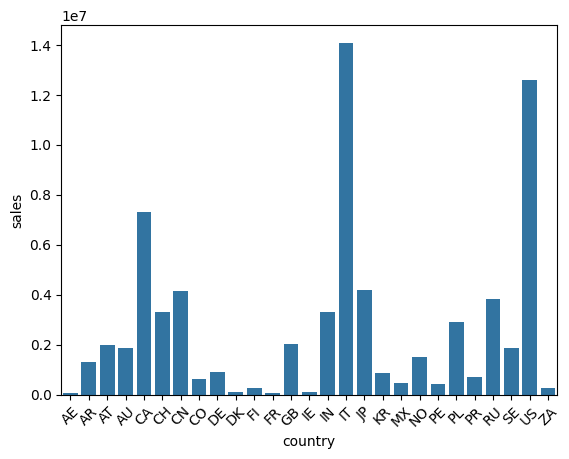

In [7]:
# Visualizations
# Sales by country
sns.barplot(x='country', y='sales', data=country_sales)
plt.xticks(rotation=45)
plt.show()

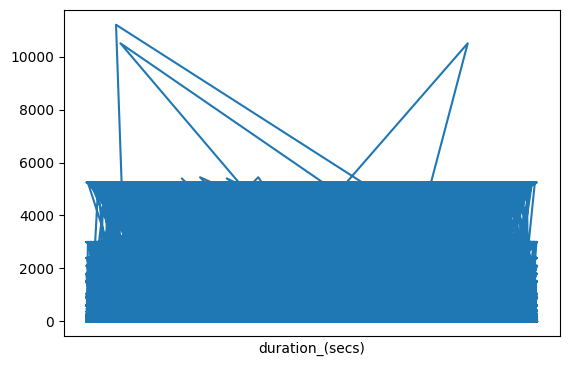

In [10]:
# Sales over time
data.set_index('duration_(secs)')['sales'].plot()
plt.show()

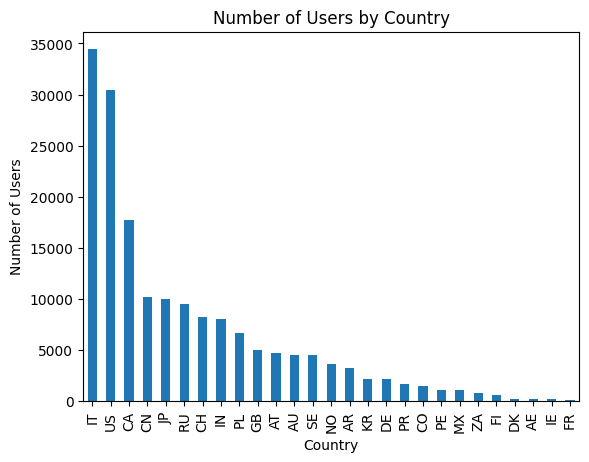

In [13]:
data['country'].value_counts().plot(kind='bar')
plt.title('Number of Users by Country')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.show()

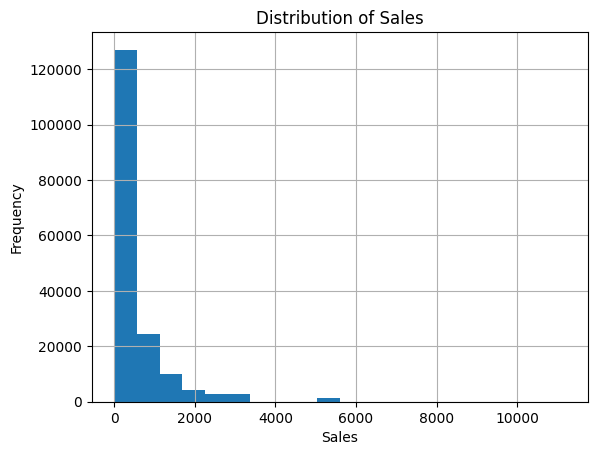

In [14]:
# Histogram of sales
data['sales'].hist(bins=20)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

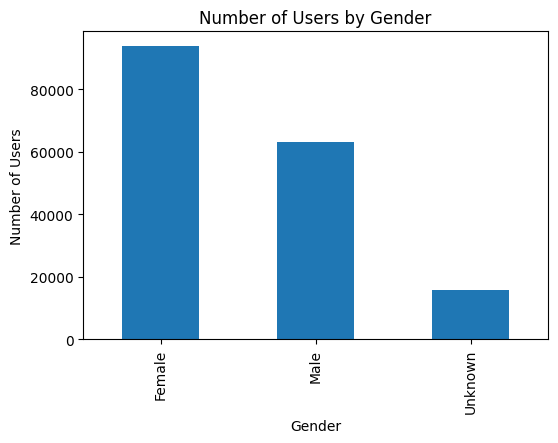

In [15]:
# Number of users by gender
plt.figure(figsize=(6, 4))
data['gender'].value_counts().plot(kind='bar')
plt.title('Number of Users by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()

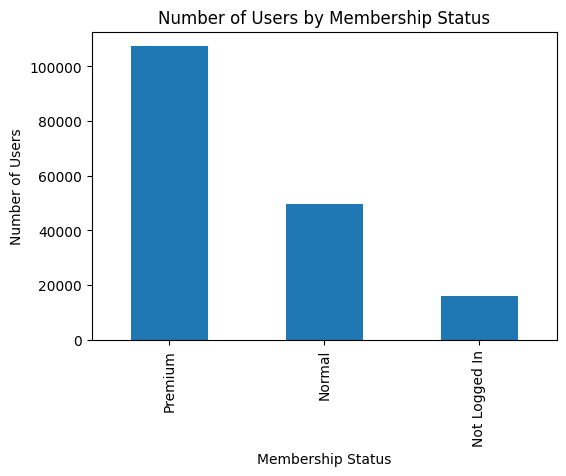

In [17]:
# Number of users by membership status
plt.figure(figsize=(6, 4))
data['membership'].value_counts().plot(kind='bar')
plt.title('Number of Users by Membership Status')
plt.xlabel('Membership Status')
plt.ylabel('Number of Users')
plt.show()

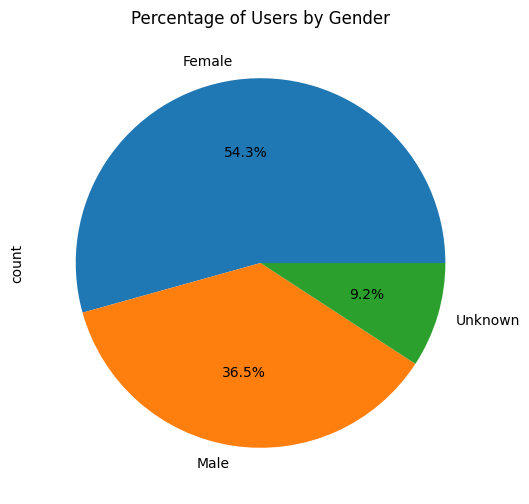

In [18]:
# Pie chart of users by gender
plt.figure(figsize=(6, 6))
data['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of Users by Gender')
plt.show()


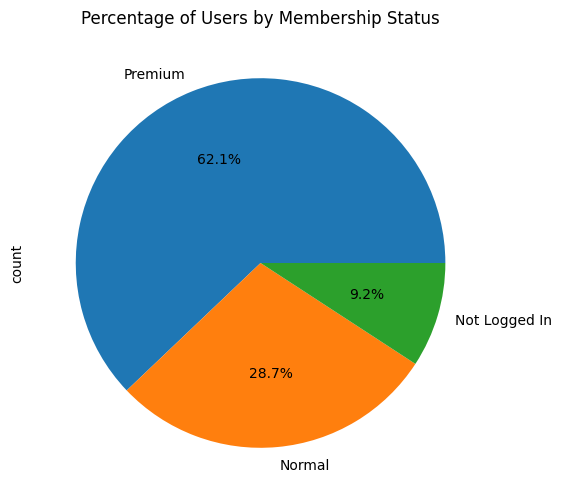

In [20]:
# Pie chart of users by membership status
plt.figure(figsize=(6, 6))
data['membership'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of Users by Membership Status')
plt.show()

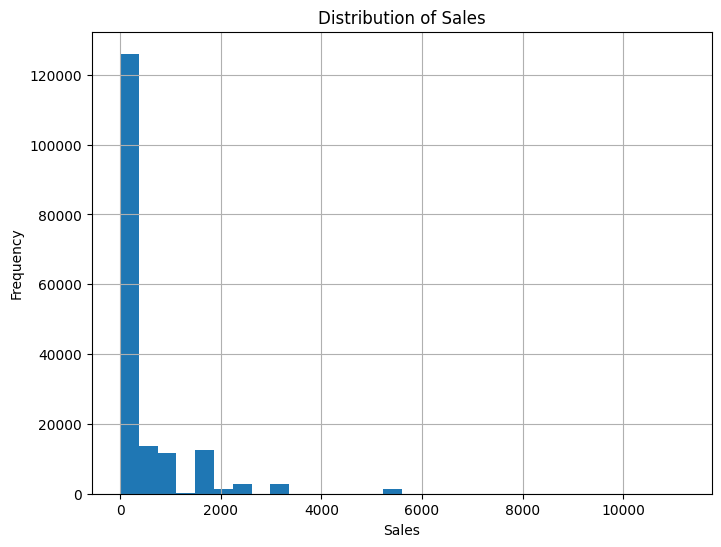

In [21]:
# Histogram of sales
plt.figure(figsize=(8, 6))
data['sales'].hist(bins=30)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()